# 1624 Assignment 2

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, confusion_matrix

In [2]:
df = pd.read_csv('clean_kaggle_data_2020.csv')

/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,206) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1. Data Cleaning 

(a) Drop all 'Other' columns

(b) Drop useless features

(c) Encode categorical data with order

(d) For each multiple choice questions, combine all parts of answer into one column

(e) Encode all the remaining categorical data

(f) Remove the row with questions

### (a) Drop all columns that contain 'OTHER'

The response "Other" contains no information. Thus, delete all the columns with answer "Other".

In [3]:
df = df[df.columns.drop(list(df.filter(regex='OTHER')))]

### (b) Drop useless features

Drop the features that are no longer of interest since they don't show anything discernable or they've been aggregating into another feature. Response time is not related to target variable. 'Q24' and 'Q24_buckets' are removed because 'Q24_Encoded' can replace them.


In [4]:
features_to_drop = ['Time from Start to Finish (seconds)','Q24','Q24_buckets']

df.drop(labels=features_to_drop, axis=1, inplace=True)

df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q24_Encoded
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


### (c) Categorical data with order

There are 7 questions with categorical answers. To clean categorical data, fill the missing values with the mode. Secondly, convert categorical data into numerical data by encoding. 

In [5]:
categoric = ['Q4','Q6','Q13','Q15','Q20','Q21','Q25']
df.loc[0,categoric]

Q4     What is the highest level of formal education ...
Q6     For how many years have you been writing code ...
Q13    Approximately how many times have you used a T...
Q15    For how many years have you used machine learn...
Q20    What is the size of the company where you are ...
Q21    Approximately how many individuals are respons...
Q25    Approximately how much money have you (or your...
Name: 0, dtype: object

In [6]:
df[categoric].isna().sum()

Q4       0
Q6       0
Q13    561
Q15    561
Q20      0
Q21      0
Q25    159
dtype: int64

In [7]:
df.fillna({x: df.loc[:,x].mode()[0] for x in categoric}, inplace=True)
df[categoric].isna().sum()

Q4     0
Q6     0
Q13    0
Q15    0
Q20    0
Q21    0
Q25    0
dtype: int64

#### Q4: Education level

The education level can be encoded and labeled from low to high.

‘I prefer not to answer’ could be treated as missing values and be replaced by mode, since the answer would fit in the one of the other class.

In [8]:
df['Q4'].unique()

array(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'], dtype=object)

In [9]:
# Remove 'I prefer not to answer'
df['Q4'].replace({'I prefer not to answer' : df['Q4'].mode().values} , inplace=True)

Q4_encoded = {
    'No formal education past high school' : 0,
    'Some college/university study without earning a bachelor’s degree' : 1,
    'Bachelor’s degree' : 2,
    'Master’s degree' : 3,
    'Doctoral degree' : 4,
    'Professional degree' : 5
}

df.loc[1:,'Q4'] = df.loc[1:,'Q4'].map(Q4_encoded)
df.loc[1:,'Q4'] = df.loc[1:,'Q4'].astype(int)
df['Q4'].unique()

array(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       3, 2, 4, 1, 5, 0], dtype=object)

#### Q6: Programming experience

The experience in writing code or programming can be encoded and labeled from low to high.

In [10]:
df['Q6'].unique()

array(['For how many years have you been writing code and/or programming?',
       '5-10 years', '10-20 years', '1-2 years', '< 1 years', '3-5 years',
       '20+ years', 'I have never written code'], dtype=object)

In [11]:
Q6_encoded = {
    'I have never written code': 0,
    '< 1 years' : 1,
    '1-2 years': 2,
    '3-5 years': 3,
    '5-10 years': 4,
    '10-20 years': 5,
    '20+ years': 6
}

df.loc[1:,'Q6'] = df.loc[1:,'Q6'].map(Q6_encoded)
df.loc[1:,'Q6'] = df.loc[1:,'Q6'].astype(int)
df['Q6'].unique()

array(['For how many years have you been writing code and/or programming?',
       4, 5, 2, 1, 3, 6, 0], dtype=object)

#### Q13: Familiarity with TPU

The familiarity with TPU can be encoded and labeled from low to high.

In [12]:
df['Q13'].unique()

array(['Approximately how many times have you used a TPU (tensor processing unit)?',
       '2-5 times', 'Never', '6-25 times', 'Once', 'More than 25 times'],
      dtype=object)

In [13]:
Q13_encoded = {
    'Never': 0,
    'Once': 1,
    '2-5 times': 2,
    '6-25 times' : 3,
    'More than 25 times': 4
}

df.loc[1:,'Q13'] = df.loc[1:,'Q13'].map(Q13_encoded)
df.loc[1:,'Q13'] = df.loc[1:,'Q13'].astype(int)
df['Q13'].unique()

array(['Approximately how many times have you used a TPU (tensor processing unit)?',
       2, 0, 3, 1, 4], dtype=object)

#### Q15: Experience in machine learning

The experience in machine learning can be encoded and labeled from low to high.

In [14]:
df['Q15'].unique()

array(['For how many years have you used machine learning methods?',
       '1-2 years', 'I do not use machine learning methods', '3-4 years',
       '2-3 years', 'Under 1 year', '4-5 years', '5-10 years',
       '20 or more years', '10-20 years'], dtype=object)

In [15]:
Q15_encoded = {
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7,
    '20 or more years': 8
}

df.loc[1:,'Q15'] = df.loc[1:,'Q15'].map(Q15_encoded)
df.loc[1:,'Q15'] = df.loc[1:,'Q15'].astype(int)
df['Q15'].unique()

array(['For how many years have you used machine learning methods?', 2, 0,
       4, 3, 1, 5, 6, 8, 7], dtype=object)

#### Q20: Size of company

The size of a company can be encoded and labeled from low to high.

In [16]:
df['Q20'].unique()

array(['What is the size of the company where you are employed?',
       '10,000 or more employees', '1000-9,999 employees',
       '250-999 employees', '0-49 employees', '50-249 employees'],
      dtype=object)

In [17]:
Q20_encoded = {
    '0-49 employees': 0,
    '50-249 employees': 1,
    '250-999 employees': 2,
    '1000-9,999 employees': 3,
    '10,000 or more employees': 4
}

df.loc[1:,'Q20'] = df.loc[1:,'Q20'].map(Q20_encoded)
df.loc[1:,'Q20'] = df.loc[1:,'Q20'].astype(int)
df['Q20'].unique()

array(['What is the size of the company where you are employed?', 4, 3, 2,
       0, 1], dtype=object)

#### Q21: Size of data science professionals

The size of individuals who are responsible for data science workloads at workplace can be ranged from low to high.

In [18]:
df['Q21'].unique()

array(['Approximately how many individuals are responsible for data science workloads at your place of business?',
       '20+', '0', '5-9', '1-2', '3-4', '10-14', '15-19'], dtype=object)

In [19]:
Q21_encoded = {
    '0': 0,
    '1-2': 1,
    '3-4': 2,
    '5-9': 3,
    '10-14': 4,
    '15-19': 5,
    '20+': 6
}

df.loc[1:,'Q21'] = df.loc[1:,'Q21'].map(Q21_encoded)
df.loc[1:,'Q21'] = df.loc[1:,'Q21'].astype(int)
df['Q21'].unique()

array(['Approximately how many individuals are responsible for data science workloads at your place of business?',
       6, 0, 3, 1, 2, 4, 5], dtype=object)

#### Q25: Investment on machine learning or service

Money spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years ranges from low to high.

In [20]:
df['Q25'].unique()

array(['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?',
       '$100,000 or more ($USD)', '$0 ($USD)', '$10,000-$99,999',
       '$1-$99', '$1000-$9,999', '$100-$999'], dtype=object)

In [21]:
Q25_encoded = {
    '$0 ($USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '$100,000 or more ($USD)': 5
}

df.loc[1:,'Q25'] = df.loc[1:,'Q25'].map(Q25_encoded)
df.loc[1:,'Q25'] = df.loc[1:,'Q25'].astype(int)
df['Q25'].unique()

array(['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?',
       5, 0, 4, 1, 3, 2], dtype=object)

### (d) Combine multiple column into one column for multiple choice questions

For multiple choice questions, each answer is separated into a column. For example, if Q7 has 12 answers, there are 12 columns labeled from part 1 to part 12. The NaN values for these column are not missing values. They represent the choice people didn't choose. Therefore, I convert the answered choice into 1 and unanswered choice into 0. By combining multiple columns for one question into one column, higher value stands for more choices that have been chosen for one question. For example, if a person chose Java and Javascript for Q7, the combined column would result in 2 (1+1=2). Higher value relates to more selections one chose and may infer more abilities one got.

For questions with alternative phrasing, the questions were kept separate, and question types were labeled with either an “A” or a “B”. However, the answers are the same. Therefore, A type and B type question can be combined into a single column.

In [22]:
# Multiple choice question 
MCQ =['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12',
    
      'Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10','Q9_Part_11',
      
      'Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4','Q10_Part_5','Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10','Q10_Part_11','Q10_Part_12','Q10_Part_13',
      
      'Q12_Part_1','Q12_Part_2','Q12_Part_3',
      
      'Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q14_Part_10','Q14_Part_11',
      
      'Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15',
      
      'Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5','Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10','Q17_Part_11',
      
      'Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5','Q18_Part_6',
      
      'Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5',
      
      'Q23_Part_1','Q23_Part_2','Q23_Part_3','Q23_Part_4','Q23_Part_5','Q23_Part_6','Q23_Part_7',
      
      'Q26_A_Part_1','Q26_A_Part_2','Q26_A_Part_3','Q26_A_Part_4','Q26_A_Part_5','Q26_A_Part_6','Q26_A_Part_7','Q26_A_Part_8','Q26_A_Part_9','Q26_A_Part_10','Q26_A_Part_11',
      
      'Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5','Q27_A_Part_6','Q27_A_Part_7','Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10','Q27_A_Part_11',
      
      'Q28_A_Part_1','Q28_A_Part_2','Q28_A_Part_3','Q28_A_Part_4','Q28_A_Part_5','Q28_A_Part_6','Q28_A_Part_7','Q28_A_Part_8','Q28_A_Part_9','Q28_A_Part_10',
      
      'Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_3','Q29_A_Part_4','Q29_A_Part_5','Q29_A_Part_6','Q29_A_Part_7','Q29_A_Part_8','Q29_A_Part_9','Q29_A_Part_10','Q29_A_Part_11','Q29_A_Part_12','Q29_A_Part_13','Q29_A_Part_14','Q29_A_Part_15','Q29_A_Part_16','Q29_A_Part_17',
      
      'Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_4','Q31_A_Part_5','Q31_A_Part_6','Q31_A_Part_7','Q31_A_Part_8','Q31_A_Part_9','Q31_A_Part_10','Q31_A_Part_11','Q31_A_Part_12','Q31_A_Part_13','Q31_A_Part_14',
      
      'Q33_A_Part_1','Q33_A_Part_2','Q33_A_Part_3','Q33_A_Part_4','Q33_A_Part_5','Q33_A_Part_6','Q33_A_Part_7',
      
      'Q34_A_Part_1','Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5','Q34_A_Part_6','Q34_A_Part_7','Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10','Q34_A_Part_11',
      
      'Q35_A_Part_1','Q35_A_Part_2','Q35_A_Part_3','Q35_A_Part_4','Q35_A_Part_5','Q35_A_Part_6','Q35_A_Part_7','Q35_A_Part_8','Q35_A_Part_9','Q35_A_Part_10',
      
      'Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7','Q36_Part_8','Q36_Part_9',
      
      'Q37_Part_1','Q37_Part_2','Q37_Part_3','Q37_Part_4','Q37_Part_5','Q37_Part_6','Q37_Part_7','Q37_Part_8','Q37_Part_9','Q37_Part_10','Q37_Part_11',
      
      'Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5','Q39_Part_6','Q39_Part_7','Q39_Part_8','Q39_Part_9','Q39_Part_10','Q39_Part_11',
      
      'Q26_B_Part_1','Q26_B_Part_2','Q26_B_Part_3','Q26_B_Part_4','Q26_B_Part_5','Q26_B_Part_6','Q26_B_Part_7','Q26_B_Part_8','Q26_B_Part_9','Q26_B_Part_10','Q26_B_Part_11',
      
      'Q27_B_Part_1','Q27_B_Part_2','Q27_B_Part_3','Q27_B_Part_4','Q27_B_Part_5','Q27_B_Part_6','Q27_B_Part_7','Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10','Q27_B_Part_11',
      
      'Q28_B_Part_1','Q28_B_Part_2','Q28_B_Part_3','Q28_B_Part_4','Q28_B_Part_5','Q28_B_Part_6','Q28_B_Part_7','Q28_B_Part_8','Q28_B_Part_9','Q28_B_Part_10',
      
      'Q29_B_Part_1','Q29_B_Part_2','Q29_B_Part_3','Q29_B_Part_4','Q29_B_Part_5','Q29_B_Part_6','Q29_B_Part_7','Q29_B_Part_8','Q29_B_Part_9','Q29_B_Part_10','Q29_B_Part_11','Q29_B_Part_12','Q29_B_Part_13','Q29_B_Part_14','Q29_B_Part_15','Q29_B_Part_16','Q29_B_Part_17',
      
      'Q31_B_Part_1','Q31_B_Part_2','Q31_B_Part_3','Q31_B_Part_4','Q31_B_Part_5','Q31_B_Part_6','Q31_B_Part_7','Q31_B_Part_8','Q31_B_Part_9','Q31_B_Part_10','Q31_B_Part_11','Q31_B_Part_12','Q31_B_Part_13','Q31_B_Part_14',
      
      'Q33_B_Part_1','Q33_B_Part_2','Q33_B_Part_3','Q33_B_Part_4','Q33_B_Part_5','Q33_B_Part_6','Q33_B_Part_7',
      
      'Q34_B_Part_1','Q34_B_Part_2','Q34_B_Part_3','Q34_B_Part_4','Q34_B_Part_5','Q34_B_Part_6','Q34_B_Part_7','Q34_B_Part_8','Q34_B_Part_9','Q34_B_Part_10','Q34_B_Part_11',
           
      'Q35_B_Part_1','Q35_B_Part_2','Q35_B_Part_3','Q35_B_Part_4','Q35_B_Part_5','Q35_B_Part_6','Q35_B_Part_7','Q35_B_Part_8','Q35_B_Part_9','Q35_B_Part_10']

In [23]:
# Fill the missing value with zero
df2 = df[MCQ]
df2 = df2.fillna(0)
# Fill the non missing value with one
df2[df2 !=0] = 1
df[MCQ] = df2
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q24_Encoded
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,1,1,1,1,...,1,1,1,1,1,1,1,1,1,NaN
1,30-34,Man,United States of America,3,Data Engineer,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,10.0
2,35-39,Man,Argentina,2,Software Engineer,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
3,30-34,Man,United States of America,3,Data Scientist,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11.0
4,35-39,Man,Germany,4,Data Scientist,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,7.0


In [24]:
# Combine multiple column for one question into one column
# Remove last part for every question because answer "None" means 
# no useful tool is chosen and thus can be treated as value 0
Q7_mcq = ['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11']
df['Q7'] = df[Q7_mcq].sum(axis=1).astype(int)
df.drop(Q7_mcq,axis=1,inplace=True)

Q9_mcq = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10']
df['Q9'] = df[Q9_mcq].sum(axis=1).astype(int)
df.drop(Q9_mcq,axis=1,inplace=True)

Q10_mcq = ['Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4','Q10_Part_5','Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10','Q10_Part_11','Q10_Part_12']
df['Q10'] = df[Q10_mcq].sum(axis=1).astype(int)
df.drop(Q10_mcq,axis=1,inplace=True)

Q12_mcq = ['Q12_Part_1','Q12_Part_2']
df['Q12'] = df[Q12_mcq].sum(axis=1).astype(int)
df.drop(Q12_mcq,axis=1,inplace=True)

Q14_mcq = ['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q14_Part_10']
df['Q14'] = df[Q14_mcq].sum(axis=1).astype(int)
df.drop(Q14_mcq,axis=1,inplace=True)

Q16_mcq = ['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14']
df['Q16'] = df[Q16_mcq].sum(axis=1).astype(int)
df.drop(Q16_mcq,axis=1,inplace=True)

Q17_mcq = ['Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5','Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10']
df['Q17'] = df[Q17_mcq].sum(axis=1).astype(int)
df.drop(Q17_mcq,axis=1,inplace=True)

Q18_mcq = ['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5']
df['Q18'] = df[Q18_mcq].sum(axis=1).astype(int)
df.drop(Q18_mcq,axis=1,inplace=True)
     
Q19_mcq = ['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4']
df['Q19'] = df[Q19_mcq].sum(axis=1).astype(int)
df.drop(Q19_mcq,axis=1,inplace=True)
     
Q23_mcq = ['Q23_Part_1','Q23_Part_2','Q23_Part_3','Q23_Part_4','Q23_Part_5','Q23_Part_6']
df['Q23'] = df[Q23_mcq].sum(axis=1).astype(int)
df.drop(Q23_mcq,axis=1,inplace=True)

################### A type questions###########################
Q26_A_mcq = ['Q26_A_Part_1','Q26_A_Part_2','Q26_A_Part_3','Q26_A_Part_4','Q26_A_Part_5','Q26_A_Part_6','Q26_A_Part_7','Q26_A_Part_8','Q26_A_Part_9','Q26_A_Part_10']
df['Q26_A'] = df[Q26_A_mcq].sum(axis=1).astype(int)
df.drop(Q26_A_mcq,axis=1,inplace=True)

Q27_A_mcq = ['Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5','Q27_A_Part_6','Q27_A_Part_7','Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10']
df['Q27_A'] = df[Q27_A_mcq].sum(axis=1).astype(int)
df.drop(Q27_A_mcq,axis=1,inplace=True)

Q28_A_mcq = ['Q28_A_Part_1','Q28_A_Part_2','Q28_A_Part_3','Q28_A_Part_4','Q28_A_Part_5','Q28_A_Part_6','Q28_A_Part_7','Q28_A_Part_8','Q28_A_Part_9']
df['Q28_A'] = df[Q28_A_mcq].sum(axis=1).astype(int)
df.drop(Q28_A_mcq,axis=1,inplace=True)

Q29_A_mcq = ['Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_3','Q29_A_Part_4','Q29_A_Part_5','Q29_A_Part_6','Q29_A_Part_7','Q29_A_Part_8','Q29_A_Part_9','Q29_A_Part_10','Q29_A_Part_11','Q29_A_Part_12','Q29_A_Part_13','Q29_A_Part_14','Q29_A_Part_15','Q29_A_Part_16']
df['Q29_A'] = df[Q29_A_mcq].sum(axis=1).astype(int)
df.drop(Q29_A_mcq,axis=1,inplace=True)

Q31_A_mcq = ['Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_4','Q31_A_Part_5','Q31_A_Part_6','Q31_A_Part_7','Q31_A_Part_8','Q31_A_Part_9','Q31_A_Part_10','Q31_A_Part_11','Q31_A_Part_12','Q31_A_Part_13']
df['Q31_A'] = df[Q31_A_mcq].sum(axis=1).astype(int)
df.drop(Q31_A_mcq,axis=1,inplace=True)

Q33_A_mcq = ['Q33_A_Part_1','Q33_A_Part_2','Q33_A_Part_3','Q33_A_Part_4','Q33_A_Part_5','Q33_A_Part_6']
df['Q33_A'] = df[Q33_A_mcq].sum(axis=1).astype(int)
df.drop(Q33_A_mcq,axis=1,inplace=True)

Q34_A_mcq = ['Q34_A_Part_1','Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5','Q34_A_Part_6','Q34_A_Part_7','Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10']
df['Q34_A'] = df[Q34_A_mcq].sum(axis=1).astype(int)
df.drop(Q34_A_mcq,axis=1,inplace=True)

Q35_A_mcq = ['Q35_A_Part_1','Q35_A_Part_2','Q35_A_Part_3','Q35_A_Part_4','Q35_A_Part_5','Q35_A_Part_6','Q35_A_Part_7','Q35_A_Part_8','Q35_A_Part_9']
df['Q35_A'] = df[Q35_A_mcq].sum(axis=1).astype(int)
df.drop(Q35_A_mcq,axis=1,inplace=True)
###############################################################

Q36_mcq = ['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7','Q36_Part_8']
df['Q36'] = df[Q36_mcq].sum(axis=1).astype(int)
df.drop(Q36_mcq,axis=1,inplace=True)

Q37_mcq = ['Q37_Part_1','Q37_Part_2','Q37_Part_3','Q37_Part_4','Q37_Part_5','Q37_Part_6','Q37_Part_7','Q37_Part_8','Q37_Part_9','Q37_Part_10']
df['Q37'] = df[Q37_mcq].sum(axis=1).astype(int)
df.drop(Q37_mcq,axis=1,inplace=True)

Q39_mcq = ['Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5','Q39_Part_6','Q39_Part_7','Q39_Part_8','Q39_Part_9','Q39_Part_10']
df['Q39'] = df[Q39_mcq].sum(axis=1).astype(int)
df.drop(Q39_mcq,axis=1,inplace=True)

################### B type questions###########################
Q26_B_mcq = ['Q26_B_Part_1','Q26_B_Part_2','Q26_B_Part_3','Q26_B_Part_4','Q26_B_Part_5','Q26_B_Part_6','Q26_B_Part_7','Q26_B_Part_8','Q26_B_Part_9','Q26_B_Part_10']
df['Q26_B'] = df[Q26_B_mcq].sum(axis=1).astype(int)
df.drop(Q26_B_mcq,axis=1,inplace=True)

Q27_B_mcq = ['Q27_B_Part_1','Q27_B_Part_2','Q27_B_Part_3','Q27_B_Part_4','Q27_B_Part_5','Q27_B_Part_6','Q27_B_Part_7','Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10']
df['Q27_B'] = df[Q27_B_mcq].sum(axis=1).astype(int)
df.drop(Q27_B_mcq,axis=1,inplace=True)

Q28_B_mcq = ['Q28_B_Part_1','Q28_B_Part_2','Q28_B_Part_3','Q28_B_Part_4','Q28_B_Part_5','Q28_B_Part_6','Q28_B_Part_7','Q28_B_Part_8','Q28_B_Part_9']
df['Q28_B'] = df[Q28_B_mcq].sum(axis=1).astype(int)
df.drop(Q28_B_mcq,axis=1,inplace=True)

Q29_B_mcq = ['Q29_B_Part_1','Q29_B_Part_2','Q29_B_Part_3','Q29_B_Part_4','Q29_B_Part_5','Q29_B_Part_6','Q29_B_Part_7','Q29_B_Part_8','Q29_B_Part_9','Q29_B_Part_10','Q29_B_Part_11','Q29_B_Part_12','Q29_B_Part_13','Q29_B_Part_14','Q29_B_Part_15','Q29_B_Part_16']
df['Q29_B'] = df[Q29_B_mcq].sum(axis=1).astype(int)
df.drop(Q29_B_mcq,axis=1,inplace=True)

Q31_B_mcq = ['Q31_B_Part_1','Q31_B_Part_2','Q31_B_Part_3','Q31_B_Part_4','Q31_B_Part_5','Q31_B_Part_6','Q31_B_Part_7','Q31_B_Part_8','Q31_B_Part_9','Q31_B_Part_10','Q31_B_Part_11','Q31_B_Part_12','Q31_B_Part_13']
df['Q31_B'] = df[Q31_B_mcq].sum(axis=1).astype(int)
df.drop(Q31_B_mcq,axis=1,inplace=True)

Q33_B_mcq = ['Q33_B_Part_1','Q33_B_Part_2','Q33_B_Part_3','Q33_B_Part_4','Q33_B_Part_5','Q33_B_Part_6']
df['Q33_B'] = df[Q33_B_mcq].sum(axis=1).astype(int)
df.drop(Q33_B_mcq,axis=1,inplace=True)

Q34_B_mcq = ['Q34_B_Part_1','Q34_B_Part_2','Q34_B_Part_3','Q34_B_Part_4','Q34_B_Part_5','Q34_B_Part_6','Q34_B_Part_7','Q34_B_Part_8','Q34_B_Part_9','Q34_B_Part_10']
df['Q34_B'] = df[Q34_B_mcq].sum(axis=1).astype(int)
df.drop(Q34_B_mcq,axis=1,inplace=True)

Q35_B_mcq = ['Q35_B_Part_1','Q35_B_Part_2','Q35_B_Part_3','Q35_B_Part_4','Q35_B_Part_5','Q35_B_Part_6','Q35_B_Part_7','Q35_B_Part_8','Q35_B_Part_9']
df['Q35_B'] = df[Q35_B_mcq].sum(axis=1).astype(int)
df.drop(Q35_B_mcq,axis=1,inplace=True)
###############################################################
# Remove the columns contain answer "Other", which are the remaining columns that have not been combined
df = df[df.columns.drop(list(df.filter(regex='Part')))]

###############################################################
# Combine A type and B type question into one single column
Q26_mcq = ['Q26_A','Q26_B']
df['Q26'] = df[Q26_mcq].sum(axis=1).astype(int)
df.drop(Q26_mcq,axis=1,inplace=True)

Q27_mcq = ['Q27_A','Q27_B']
df['Q27'] = df[Q27_mcq].sum(axis=1).astype(int)
df.drop(Q27_mcq,axis=1,inplace=True)

Q28_mcq = ['Q28_A','Q28_B']
df['Q28'] = df[Q28_mcq].sum(axis=1).astype(int)
df.drop(Q28_mcq,axis=1,inplace=True)

Q29_mcq = ['Q29_A','Q29_B']
df['Q29'] = df[Q29_mcq].sum(axis=1).astype(int)
df.drop(Q29_mcq,axis=1,inplace=True)

Q31_mcq = ['Q31_A','Q31_B']
df['Q31'] = df[Q31_mcq].sum(axis=1).astype(int)
df.drop(Q31_mcq,axis=1,inplace=True)

Q33_mcq = ['Q33_A','Q33_B']
df['Q33'] = df[Q33_mcq].sum(axis=1).astype(int)
df.drop(Q33_mcq,axis=1,inplace=True)

Q34_mcq = ['Q34_A','Q34_B']
df['Q34'] = df[Q34_mcq].sum(axis=1).astype(int)
df.drop(Q34_mcq,axis=1,inplace=True)

Q35_mcq = ['Q35_A','Q35_B']
df['Q35'] = df[Q35_mcq].sum(axis=1).astype(int)
df.drop(Q35_mcq,axis=1,inplace=True)

In [25]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q25,Q30,Q32,Q38,Q24_Encoded,Q7,Q9,Q10,Q12,Q14,Q16,Q17,Q18,Q19,Q23,Q36,Q37,Q39,Q26,Q27,Q28,Q29,Q31,Q33,Q34,Q35
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming language would you recommend ...,What type of computing platform do you use mos...,Approximately how many times have you used a T...,For how many years have you used machine learn...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Approximately how much money have you (or your...,Which of the following big data products (rela...,Which of the following business intelligence t...,What is the primary tool that you use at work ...,NaN,11,10,12,2,10,14,10,5,4,6,8,10,10,20,20,18,32,26,12,20,18
1,30-34,Man,United States of America,3,Data Engineer,4,Python,A personal computer or laptop,2,2,4,6,"We have well established ML methods (i.e., mod...",5,PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta...",10.0,3,3,1,1,4,4,3,2,2,2,1,3,7,3,4,1,3,3,0,0,0
2,35-39,Man,Argentina,2,Software Engineer,5,R,A personal computer or laptop,0,0,3,0,No (we do not use ML methods),0,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",1.0,3,4,0,0,1,0,0,0,0,0,0,4,3,0,0,0,3,0,0,0,0
3,30-34,Man,United States of America,3,Data Scientist,4,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2,4,2,3,"We have well established ML methods (i.e., mod...",4,MySQL,NaN,"Local development environments (RStudio, Jupyt...",11.0,3,1,0,0,3,4,5,0,0,3,0,4,0,2,2,0,2,1,0,0,0
4,35-39,Man,Germany,4,Data Scientist,4,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2,3,3,6,"We have well established ML methods (i.e., mod...",4,Microsoft Azure Data Lake Storage,NaN,"Cloud-based data software & APIs (AWS, GCP, Az...",7.0,3,4,2,1,4,5,2,3,0,3,1,5,3,2,3,0,3,0,0,0,1


### (e) Encode all the remaining categorical data

In [26]:
feature_remain = ['Q1','Q2','Q3','Q5','Q8','Q11','Q22','Q30','Q32','Q38']

# fill all NaNs by mode
df.fillna({x: df.loc[:,x].mode()[0] for x in feature_remain}, inplace=True)
for col in feature_remain:
    df.loc[:,col] = df.loc[:,col].astype('category')
    df.loc[:,col] = df.loc[:,col].cat.codes

df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q25,Q30,Q32,Q38,Q24_Encoded,Q7,Q9,Q10,Q12,Q14,Q16,Q17,Q18,Q19,Q23,Q36,Q37,Q39,Q26,Q27,Q28,Q29,Q31,Q33,Q34,Q35
0,11,4,15,What is the highest level of formal education ...,9,For how many years have you been writing code ...,13,5,Approximately how many times have you used a T...,For how many years have you used machine learn...,What is the size of the company where you are ...,Approximately how many individuals are respons...,0,Approximately how much money have you (or your...,17,14,6,NaN,11,10,12,2,10,14,10,5,4,6,8,10,10,20,20,18,32,26,12,20,18
1,3,0,54,3,3,4,9,2,2,2,4,6,4,5,14,6,2,10.0,3,3,1,1,4,4,3,2,2,2,1,3,7,3,4,1,3,3,0,0,0
2,4,0,0,2,10,5,10,2,0,0,3,0,2,0,11,13,1,1.0,3,4,0,0,1,0,0,0,0,0,0,4,3,0,0,0,3,0,0,0,0
3,3,0,54,3,4,4,9,0,2,4,2,3,4,4,11,13,4,11.0,3,1,0,0,3,4,5,0,0,3,0,4,0,2,2,0,2,1,0,0,0
4,4,0,12,4,4,4,9,0,2,3,3,6,4,4,8,13,3,7.0,3,4,2,1,4,5,2,3,0,3,1,5,3,2,3,0,3,0,0,0,1


### (f) Remove the row with questions

In [27]:
# Remove the first row which is the question
df = df.iloc[1:]
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q25,Q30,Q32,Q38,Q24_Encoded,Q7,Q9,Q10,Q12,Q14,Q16,Q17,Q18,Q19,Q23,Q36,Q37,Q39,Q26,Q27,Q28,Q29,Q31,Q33,Q34,Q35
1,3,0,54,3,3,4,9,2,2,2,4,6,4,5,14,6,2,10.0,3,3,1,1,4,4,3,2,2,2,1,3,7,3,4,1,3,3,0,0,0
2,4,0,0,2,10,5,10,2,0,0,3,0,2,0,11,13,1,1.0,3,4,0,0,1,0,0,0,0,0,0,4,3,0,0,0,3,0,0,0,0
3,3,0,54,3,4,4,9,0,2,4,2,3,4,4,11,13,4,11.0,3,1,0,0,3,4,5,0,0,3,0,4,0,2,2,0,2,1,0,0,0
4,4,0,12,4,4,4,9,0,2,3,3,6,4,4,8,13,3,7.0,3,4,2,1,4,5,2,3,0,3,1,5,3,2,3,0,3,0,0,0,1
5,4,0,54,4,8,2,10,2,0,1,0,1,6,1,11,13,4,3.0,1,1,0,0,1,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0


## 2. Exploratory data analysis and feature selection

### (a) correlation plot

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. Values closer to +1 means there is strong positive correlation between two variables. Values closer to -1 means there is strong negative correlation between two variables. The diagonals are all dark red because those squares are correlating each variable to itself (so it's a perfect correlation). 

Correlation plot is shown as a heatmap. The parameter cmap is “coolwarm”, thus cooler color means stronger negative correlation while warmer color means stronger positive correlation. As the correlation plot shown, “Q1 Age” and “Q3 Country” are the most related feature to a survey respondent’s yearly compensation with the same correlation value 0.4. The feature of importance is also shown as a bar chart with ascending order. Top four important features are “Q1 Age”, “Q3 Country”, “Q23 Important activities at work”, “Q22 Machine learning”.

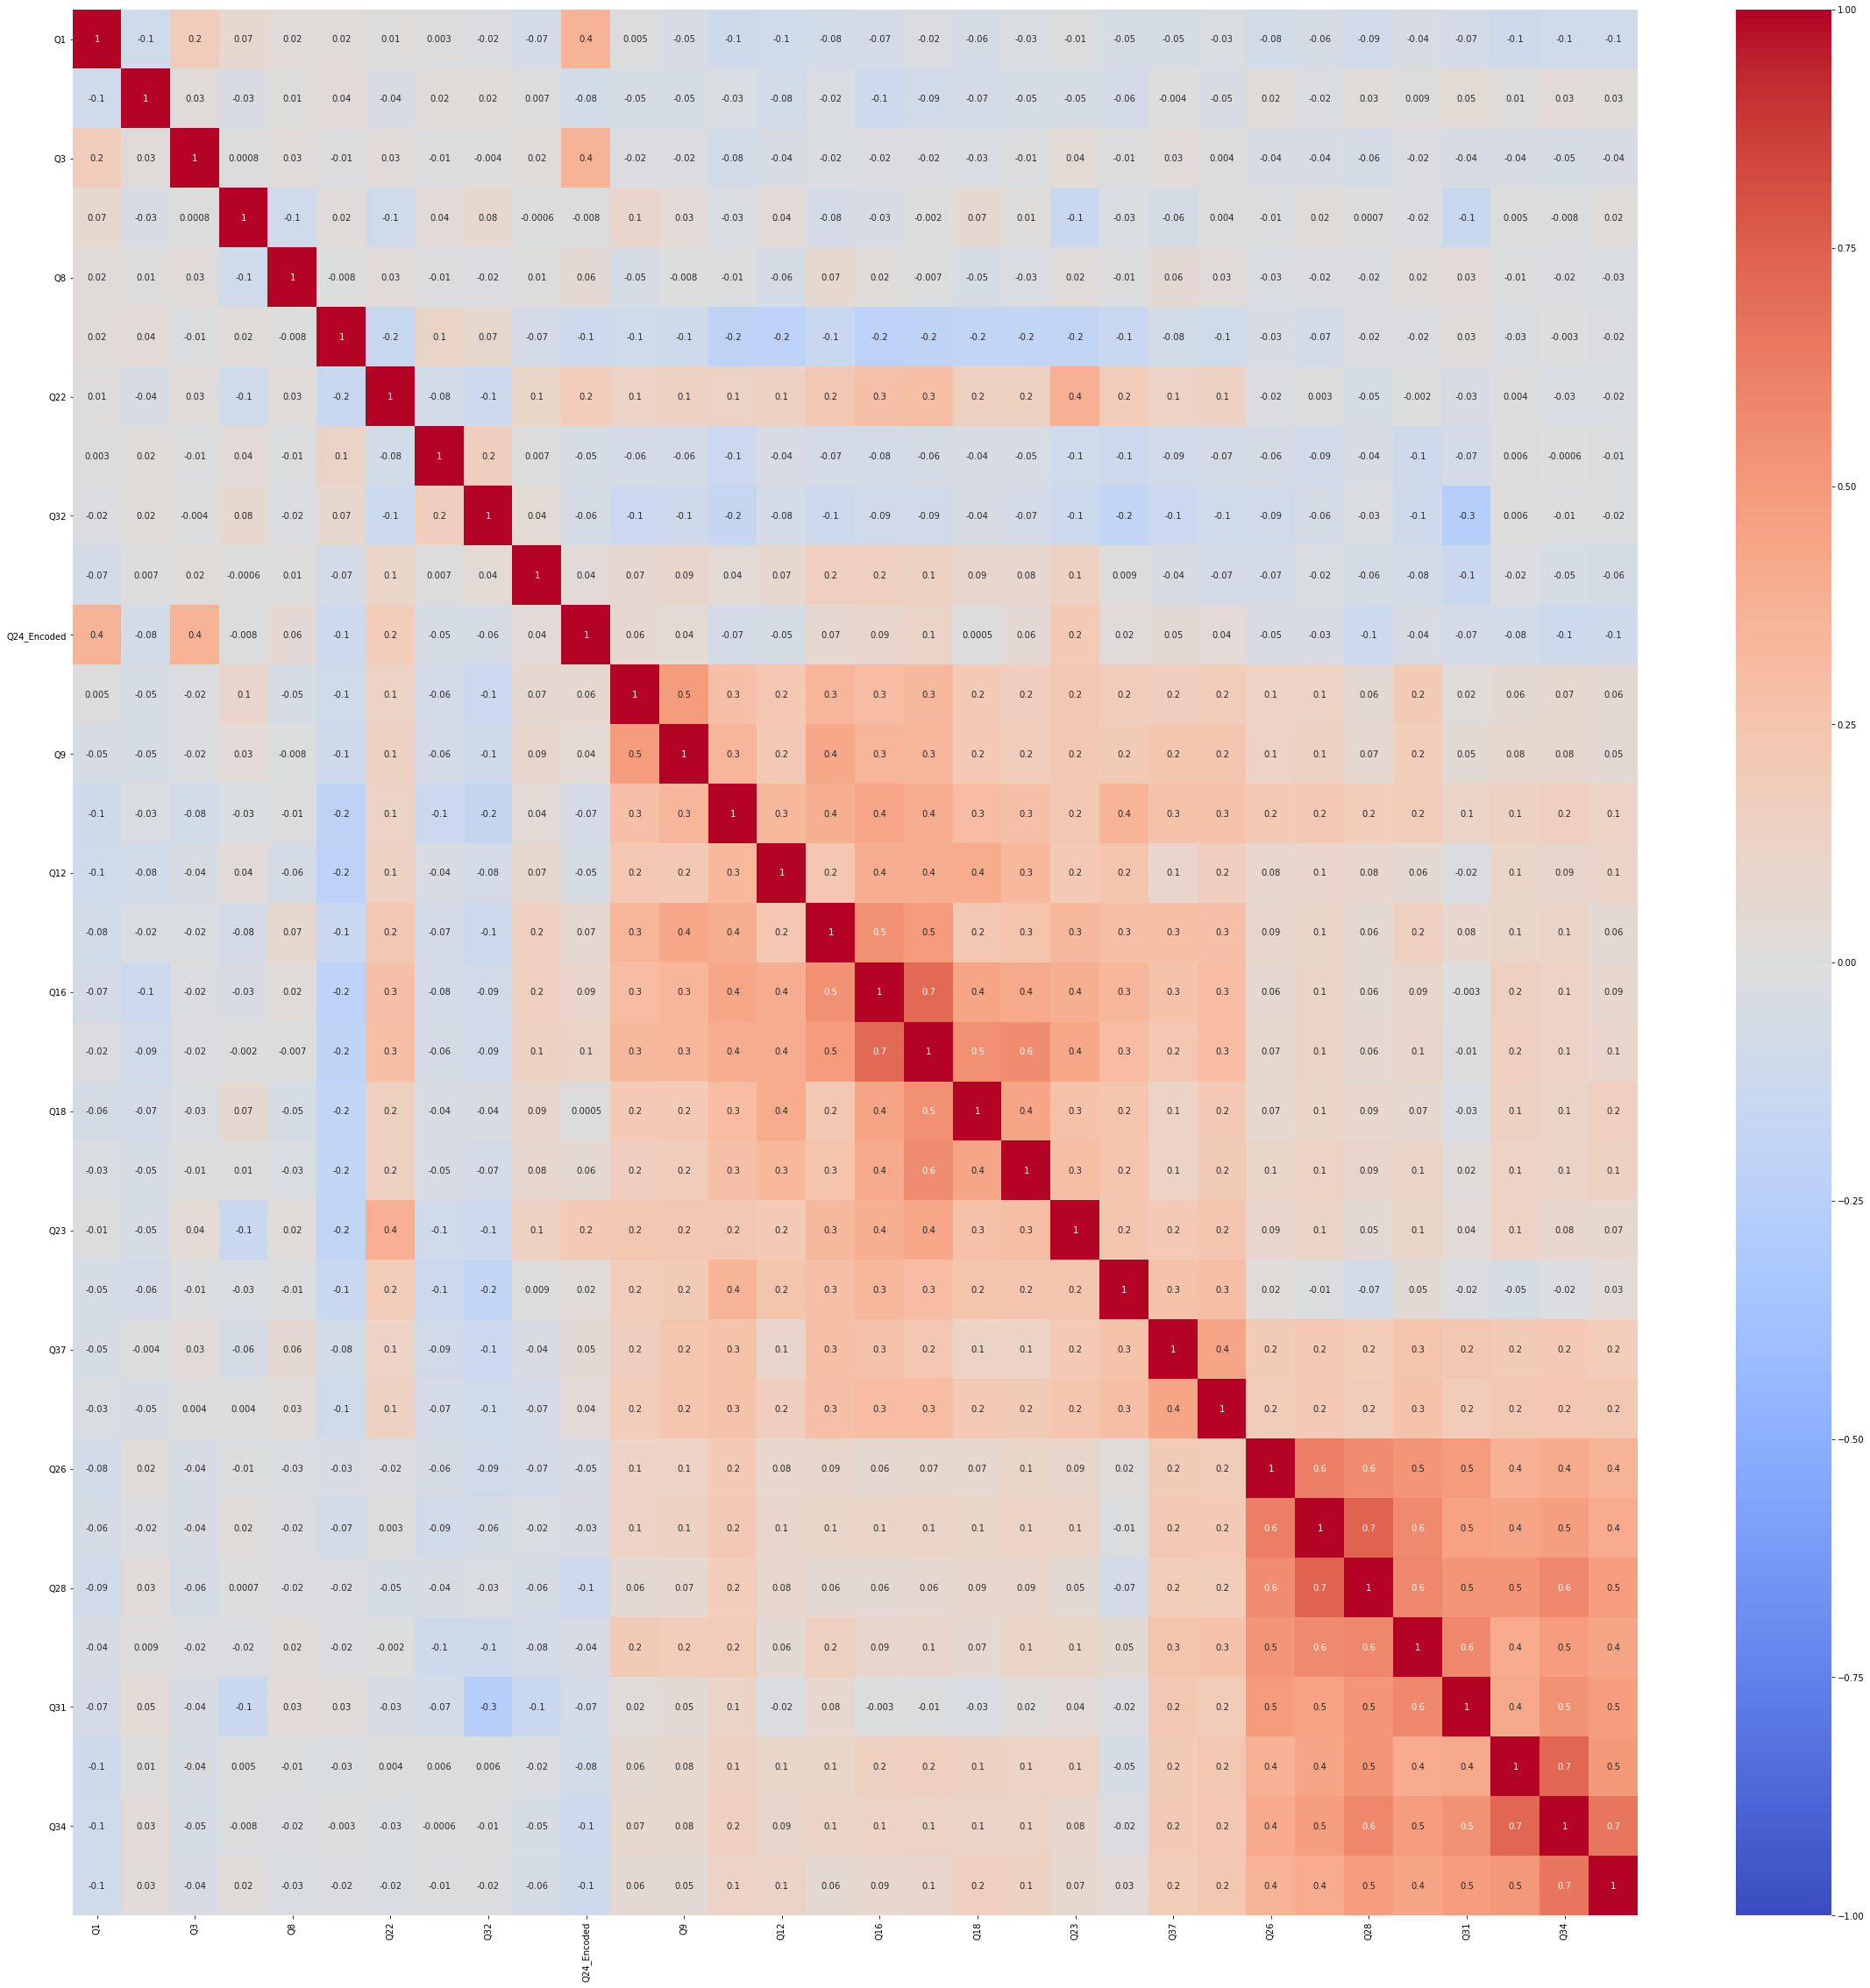

In [28]:
ax = sns.heatmap(df.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(40,40)
plt.show()


### (b) visualize the order of feature importance.

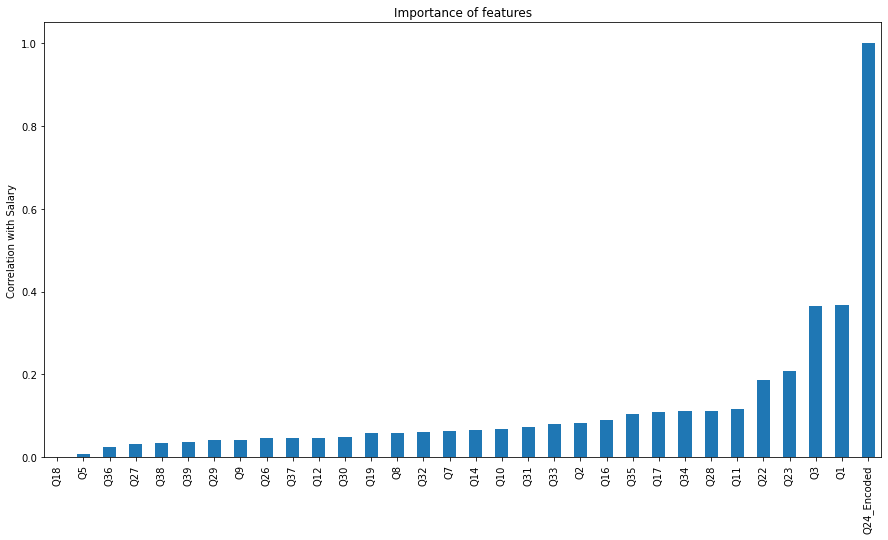

In [29]:
correlation = df.corr().Q24_Encoded.apply(lambda x:abs(x)).sort_values()
ax = (correlation.plot(kind="bar",figsize=(15,8),title="Importance of features"))
ax.set_ylabel('Correlation with Salary')
plt.show()

### (c) feature engineering and feature selection

In this assignment, all features are already transformed into categorical data. Feature selection can be done through statistical test which examine the relationship between features and target variable salary. 

The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related). The null hypothesis for this test is that there is no relationship between the feature and target variable salary. The alternative hypothesis is that there is a relationship between them. If there is any feature that is independent with target variable, it is irrelevant and thus can be removed.

Compute a Chi-Square Test for every feature. By setting the confidence level as 0.05, if p-value is below 0.05, significant result, reject null hypothesis (H0), dependent; if p-value is larger than 0.05, not significant result, fail to reject null hypothesis (H0), independent.  

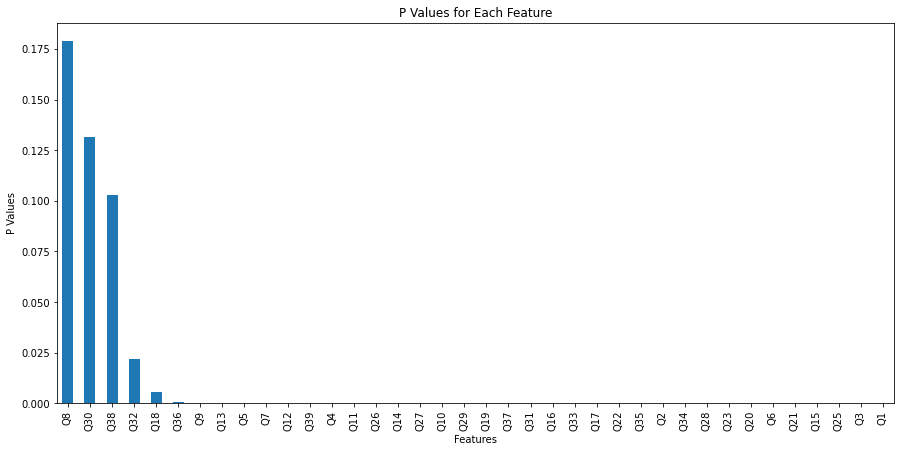

In [30]:
from sklearn.feature_selection import chi2
y = df["Q24_Encoded"]
X = df.drop('Q24_Encoded',axis=1)
cols = X.columns

chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(15,7))
p_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('P Values')
plt.title('P Values for Each Feature')
plt.show()

In [31]:
# drop the features that is not statistically significant
df.drop(['Q8','Q30','Q38'],axis=1,inplace=True)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,Q21,Q22,Q25,Q32,Q24_Encoded,Q7,Q9,Q10,Q12,Q14,Q16,Q17,Q18,Q19,Q23,Q36,Q37,Q39,Q26,Q27,Q28,Q29,Q31,Q33,Q34,Q35
1,3,0,54,3,3,4,2,2,2,4,6,4,5,6,10.0,3,3,1,1,4,4,3,2,2,2,1,3,7,3,4,1,3,3,0,0,0
2,4,0,0,2,10,5,2,0,0,3,0,2,0,13,1.0,3,4,0,0,1,0,0,0,0,0,0,4,3,0,0,0,3,0,0,0,0
3,3,0,54,3,4,4,0,2,4,2,3,4,4,13,11.0,3,1,0,0,3,4,5,0,0,3,0,4,0,2,2,0,2,1,0,0,0
4,4,0,12,4,4,4,0,2,3,3,6,4,4,13,7.0,3,4,2,1,4,5,2,3,0,3,1,5,3,2,3,0,3,0,0,0,1
5,4,0,54,4,8,2,2,0,1,0,1,6,1,13,3.0,1,1,0,0,1,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0


## 3. Model implementation

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Create and fit a model
# train and fit a model to the training set we created above.
import warnings
warnings.filterwarnings("ignore")

### Ordinal logistic regression

Ordinal logistic regression is where the dependent variable is ordinal. Multiple binary
classification with orders is required before logistic regression is conducted. Since there are 15 classes in target variable salary, the binary classification is conducted by separating the classes from low to high. Let Y be an ordinal outcome with 15 categories. Then cumulative probability P(Y<=j) is the cumulative probabilities of Y less than or equal to a specific category j = 0, ..., 14. The probabilities for each class is calculated by the new cumulative probabilities minus last cumulative probabilities. For example, I computed the probabilities for class 0, class 0 + class 1, class 0 + class 1 + class 2, etc. And then, I get probabilities for class 0, class 1, class 2, etc. After the probability for each class is computed, the class with maximum probability for each observation is selected to finish the multi-class predictions. As a result, the accuracy scores across folds are pretty similar and the average accuracy score is 80.429% with the variance 0.034%.

In [33]:
# Q24_Encoded is the target variable while all the others are independent variables.
X = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']

# split the training set into a training and validation set, 
# with a 70%-30% split. We do this with the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


def ordinary_multi_class(X_train, y_train, X_test):
    
    model = LogisticRegression() 
    p = []
    p0 = 0
    
    for i in range(14):
        
        if i != 13:
            # binary classification
            a = list(map(lambda x: 0 if x <= i else 1, y_train)) 
            model.fit(X_train, a)
            # probability of class 0
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1) # get the probabilities for class 0
            # probability of a single class
            p1 = sum_p - p0 
            # append every class's probability
            p.append(p1)
            # update the probability of class 0
            p0 = sum_p
        
        else: 
            
            a = list(map(lambda x: 0 if x <= i else 1, y_train))
            model.fit(X_train, a)
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1)
            # probability for class 14
            p14 = model.predict_proba(X_train)[:,1].reshape(len(X_train),1)
            # probability for class 13
            p1 = sum_p - p0
            p.append(p1)
            p.append(p14)
            
    p = np.array(p).reshape(15,len(X_train)).T
    
    return p

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10,random_state=42)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
np_idx = 0


for train_idx, test_idx in kfold.split(X):
    
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_train)
    
    p = ordinary_multi_class(X_train,y_train,X_test) 

    class_train = np.argmax(p,axis=1)  
    
    TN = confusion_matrix(y_train, class_train)[0][0]
    FP = confusion_matrix(y_train, class_train)[0][1]
    FN = confusion_matrix(y_train, class_train)[1][0]
    TP = confusion_matrix(y_train, class_train)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total) * 100
    
    accuracy[np_idx] = ACC
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   
print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.var(accuracy),3)))

Fold 1: Accuracy: 80.51%
Fold 2: Accuracy: 80.235%
Fold 3: Accuracy: 80.709%
Fold 4: Accuracy: 80.084%
Fold 5: Accuracy: 80.58%
Fold 6: Accuracy: 80.292%
Fold 7: Accuracy: 80.285%
Fold 8: Accuracy: 80.539%
Fold 9: Accuracy: 80.546%
Fold 10: Accuracy: 80.508%
Average Score: 80.429%(0.034%)


### Bias-variance trade-off

Bias of an estimator equals to the expected value of the estimator minus true value. To avoid negative value, I use squared bias.

I tested parameter C in list [0.001,0.01,0.1,1,10,100] and plot the bias variance trade-off on that.
I found that as C gets larger, the bias gets lower while variance gets larger. In order to decrease
bias, complexity should be increased.

bias according to parameter C = [0.001,0.01,0.1,1,10,100]:  [20.71341504276038, 17.81687222069082, 17.467994590167685, 17.44966362063861, 17.4470333001916, 17.44851420178571]
variance according to parameter C = [0.001,0.01,0.1,1,10,100]:  [8.0, 14.1, 15.6, 16.0, 16.0, 16.0]


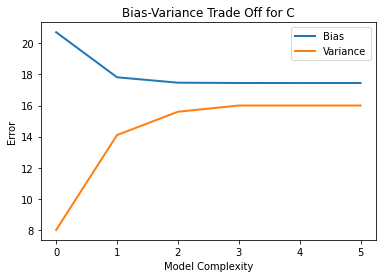

In [34]:
import statistics 

# Bias = (E(x_bar) - x)^2
def bias(y,predictions):
    y = np.array(y)
    predictions = np.array(predictions)
    return np.mean(np.power((predictions - y),2))

X = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
scaler = StandardScaler()
kfold = KFold(n_splits=10,random_state=42)
kfold.get_n_splits(X)
bias1 = []
var1 = []

def ordinary_multi_class(X_train, y_train, X_test):
    p = []
    p0 = 0
    
    for i in range(14):
        
        if i != 13:
            # binary classification
            a = list(map(lambda x: 0 if x <= i else 1, y_train)) 
            model.fit(X_train, a)
            # probability of class 0
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1)
            # probability of a single class
            p1 = sum_p - p0 
            # append every class's probability
            p.append(p1)
            # update the probability of class 0
            p0 = sum_p
        
        else: 
            
            a = list(map(lambda x: 0 if x <= i else 1, y_train))
            model.fit(X_train, a)
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1)
            # probability for class 14
            p14 = model.predict_proba(X_train)[:,1].reshape(len(X_train),1)
            # probability for class 13
            p1 = sum_p - p0
            p.append(p1)
            p.append(p14)
            
    p = np.array(p).reshape(15,len(X_train)).T
    
    return p

C = [0.001,0.01,0.1,1,10,100]
for c in C: 
    np_idx = 0
    bias_c = np.zeros(10)
    variance_c = np.zeros(10)
    model = LogisticRegression(C=c)
    for train_idx, test_idx in kfold.split(X):

        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)

        predictions = model.predict(X_train)
        
        p_train = ordinary_multi_class(X_train,y_train,X_test) 
    
        class_index = np.argmax(p_train,axis=1)  
        
        bias_c[np_idx] = bias(y_train, class_index)
        
        variance_c[np_idx]= statistics.variance(class_index)

        np_idx += 1
    bias1.append(np.mean(bias_c))
    var1.append(np.mean(variance_c))

print("bias according to parameter C = [0.001,0.01,0.1,1,10,100]: ",bias1)
print("variance according to parameter C = [0.001,0.01,0.1,1,10,100]: ",var1)
C = [0.001,0.01,0.1,1,10,100]
plt.plot(bias1, label="Bias",linewidth = 2)
plt.plot(var1, label="Variance", linewidth = 2)
plt.legend()
plt.title("Bias-Variance Trade Off for C")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.show()


I also tested parameter solver in list ['newton-cg','lbfgs','liblinear','sag'] and plot the bias variance trade-off. The bias are the same for all solvers. Thus, to minimize variance, solver “liblinear” is selected.

bias according to parameter solver = ['newton-cg','lbfgs','liblinear','sag']:  [17.449839676976634, 17.44966362063861, 17.452843258008173, 17.44788232866183]
variance according to parameter solver = ['newton-cg','lbfgs','liblinear','sag']:  [16.0, 16.0, 15.9, 16.0]


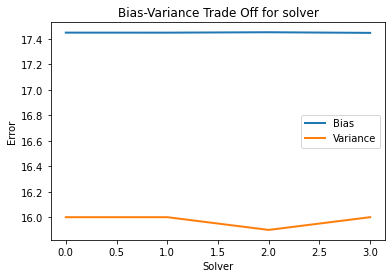

In [35]:
import statistics 
X = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
scaler = StandardScaler()
kfold = KFold(n_splits=10,random_state=42)
kfold.get_n_splits(X)
bias1 = []
var1 = []

def ordinary_multi_class(X_train, y_train, X_test):
    p = []
    p0 = 0
    
    for i in range(14):
        
        if i != 13:
            # binary classification
            a = list(map(lambda x: 0 if x <= i else 1, y_train)) 
            model.fit(X_train, a)
            # probability of class 0
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1) 
            # probability of a single class
            p1 = sum_p - p0 
            # append every class's probability
            p.append(p1)
            # update the probability of class 0
            p0 = sum_p
        
        else: 
            
            a = list(map(lambda x: 0 if x <= i else 1, y_train))
            model.fit(X_train, a)
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1)
            # probability for class 14
            p14 = model.predict_proba(X_train)[:,1].reshape(len(X_train),1)
            # probability for class 13
            p1 = sum_p - p0
            p.append(p1)
            p.append(p14)
            
    p = np.array(p).reshape(15,len(X_train)).T
    
    return p

solver = ['newton-cg','lbfgs','liblinear','sag']

for solver in solver: 
    np_idx = 0
    bias_c = np.zeros(10)
    variance_c = np.zeros(10)
    model = LogisticRegression(solver=solver)
    for train_idx, test_idx in kfold.split(X):

        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)

        predictions = model.predict(X_train)
        
        p_train = ordinary_multi_class(X_train,y_train,X_test) 
    
        class_index = np.argmax(p_train,axis=1)  
        
        bias_c[np_idx] = bias(y_train, class_index)
        
        variance_c[np_idx]= statistics.variance(class_index)

        np_idx += 1
    bias1.append(np.mean(bias_c))
    var1.append(np.mean(variance_c))

print("bias according to parameter solver = ['newton-cg','lbfgs','liblinear','sag']: ",bias1)
print("variance according to parameter solver = ['newton-cg','lbfgs','liblinear','sag']: ",var1)

plt.plot(bias1, label="Bias",linewidth = 2)
plt.plot(var1, label="Variance", linewidth = 2)
plt.legend()
plt.title("Bias-Variance Trade Off for solver")
plt.xlabel('Solver')
plt.ylabel('Error')
plt.show()

## 4. Model Tuning

For the LogisticRegression(), the parameters are as following: 'penalty', 'dual', 'tol', 'C', 'fit_intercept', 'intercept_scaling', 'class_weight', 'random_state', 'solver', 'max_iter', 'multi_class', 'verbose', 'warm_start', 'n_jobs', 'l1_ratio'.
    
I select C and penalty for model tunning. C is the inverse of regularization strength. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which implies the model is allowed to increase it's complexity, and therefore, overfit the data. L1 penalty leads to sparser solutions while L2 penalty leads to more constrained solutions. Moreover, the Elastic-Net penalty sparsity is between that of L1 and L2.

Grid search is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. In this case, I pass predefined values for hyperparameters "C" and "penalty" to the GridSearchCV function. GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. As a result, the optimal parameters for "C" and "penalty" are 0.01 and 'l2' respectively with the highest accuracy 80.429%. 

In [36]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,10,100],
        'penalty' : ['l1', 'l2', 'elasticnet']}
model_cv = GridSearchCV(model, grid, cv=10)
model_cv.fit(X_train,y_train)
model_cv.best_estimator_.get_params()


{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Q24_Encoded is the target variable while all the others are independent variables.
X = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']

# split the training set into a training and validation set, 
# with a 70%-30% split. We do this with the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


def ordinary_multi_class(X_train, y_train, X_test):
    
    model = LogisticRegression() 
    p = []
    p0 = 0
    
    for i in range(14):
        
        if i != 13:
            # binary classification
            a = list(map(lambda x: 0 if x <= i else 1, y_train)) 
            model.fit(X_train, a)
            # probability of class 0
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1) 
            # probability of a single class
            p1 = sum_p - p0 
            # append every class's probability
            p.append(p1)
            # update the probability of class 0
            p0 = sum_p
        
        else: 
            
            a = list(map(lambda x: 0 if x <= i else 1, y_train))
            model.fit(X_train, a)
            sum_p = model.predict_proba(X_train)[:,0].reshape(len(X_train),1)
            # probability for class 14
            p14 = model.predict_proba(X_train)[:,1].reshape(len(X_train),1)
            # probability for class 13
            p1 = sum_p - p0
            p.append(p1)
            p.append(p14)
            
    p = np.array(p).reshape(15,len(X_train)).T
    
    return p

model = LogisticRegression(C=0.01, penalty='l2')
scaler = StandardScaler()
kfold = KFold(n_splits=10,random_state=42)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
np_idx = 0


for train_idx, test_idx in kfold.split(X):
    
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_train)
    
    p = ordinary_multi_class(X_train,y_train,X_test) 

    class_train = np.argmax(p,axis=1)  
    
    TN = confusion_matrix(y_train, class_train)[0][0]
    FP = confusion_matrix(y_train, class_train)[0][1]
    FN = confusion_matrix(y_train, class_train)[1][0]
    TP = confusion_matrix(y_train, class_train)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total) * 100
    
    accuracy[np_idx] = ACC
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   
print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.var(accuracy),3)))

Fold 1: Accuracy: 80.51%
Fold 2: Accuracy: 80.235%
Fold 3: Accuracy: 80.709%
Fold 4: Accuracy: 80.084%
Fold 5: Accuracy: 80.58%
Fold 6: Accuracy: 80.292%
Fold 7: Accuracy: 80.285%
Fold 8: Accuracy: 80.539%
Fold 9: Accuracy: 80.546%
Fold 10: Accuracy: 80.508%
Average Score: 80.429%(0.034%)


## 5. Testing and Discussion

The optimal model got 80.25% accuracy and 2.181% variance on test set and 80.429% accuracy and 0.034% variance on training set. Thus, training set produce higher accuracy than the test set. 

In [38]:
# Q24_Encoded is the target variable while all the others are independent variables.
X = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']

# split the training set into a training and validation set, 
# with a 70%-30% split. We do this with the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Change all train set into test set when it comes to predict value
def ordinary_multi_class(X_train, y_train, X_test):
    p = []
    p0 = 0
    
    for i in range(14):
        
        if i != 13:
            # binary classification
            a = list(map(lambda x: 0 if x <= i else 1, y_train)) 
            model.fit(X_train, a)
            # probability of class 0
            sum_p = model.predict_proba(X_test)[:,0].reshape(len(X_test),1) 
            # probability of a single class
            p1 = sum_p - p0 
            # append every class's probability
            p.append(p1)
            # update the probability of class 0
            p0 = sum_p
        
        else: 
            
            a = list(map(lambda x: 0 if x <= i else 1, y_train))
            model.fit(X_train, a)
            sum_p = model.predict_proba(X_test)[:,0].reshape(len(X_test),1)
           # probability for class 14
            p14 = model.predict_proba(X_test)[:,1].reshape(len(X_test),1)
            # probability for class 13
            p1 = sum_p - p0
            p.append(p1)
            p.append(p14)
            
    p = np.array(p).reshape(15,len(X_test)).T
    
    return p

model = LogisticRegression(C=0.01,penalty="l2")
scaler = StandardScaler()
kfold = KFold(n_splits=10,random_state=42)
kfold.get_n_splits(X)
accuracy_test = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    # predict based on test set
    predictions = model.predict(X_test)
    p = ordinary_multi_class(X_train,y_train,X_test)
    class_test = np.argmax(p,axis=1)  

    TN = confusion_matrix(y_test, class_test)[0][0]
    FP = confusion_matrix(y_test, class_test)[0][1]
    FN = confusion_matrix(y_test, class_test)[1][0]
    TP = confusion_matrix(y_test, class_test)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total) * 100
    
    accuracy_test[np_idx] = ACC
    
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy_test),3),round(np.var(accuracy_test),3)))

Fold 1: Accuracy: 79.887%
Fold 2: Accuracy: 81.522%
Fold 3: Accuracy: 77.858%
Fold 4: Accuracy: 83.148%
Fold 5: Accuracy: 79.271%
Fold 6: Accuracy: 81.154%
Fold 7: Accuracy: 81.404%
Fold 8: Accuracy: 78.918%
Fold 9: Accuracy: 79.231%
Fold 10: Accuracy: 80.109%
Average Score: 80.25%(2.181%)


### Overfitting or underfitting ?

To see whether the model is overfitting or underfitting, I used DecisionTreeClassifier and test different tree depths with the “max_depth” argument. A plot is created to show line plots of the model accuracy on the train and test sets with different tree depths.

The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets. This continues until a depth of around 5 levels, after which the model is shown to overfit the training dataset at the cost of worse performance on the holdout dataset.

Overfitting is the case where model performance on the training dataset is improved at the cost of worse performance on data not seen during training. Therefore, the model is overfitting.

Overfitting normally occurs when there are too many parameters because training a model with so many parameters that it can fit nearly any dataset. Therefore, we can reduce the number of trainable parameters so as to reduce the complexity of model. Also, we can use smaller C parameter so as to increase the regularization strength which will create simple models which underfit the data.

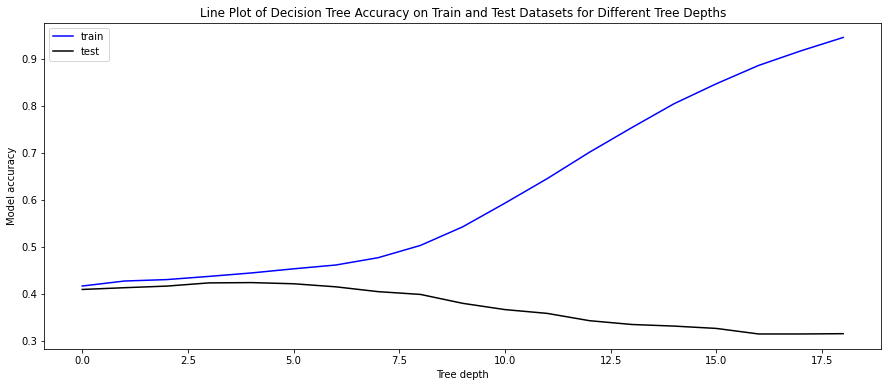

In [39]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop(['Q24_Encoded'],axis=1)
y = df['Q24_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
train_score = []
test_score = []

for i in range (1,20):
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    acc_train= accuracy_score(y_train, pred_train)
    train_score.append(acc_train)

    pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test, pred_test)
    test_score.append(acc_test)

fig, ax = plt.subplots(figsize=(15, 6))

x = np.arange(1, 20, 0.1)
y = train_score
z = test_score

ax.plot(y, color='blue', label='train')
ax.plot(z, color='black', label='test')
plt.title("Line Plot of Decision Tree Accuracy on Train and Test Datasets for Different Tree Depths")
plt.xlabel('Tree depth')
plt.ylabel('Model accuracy')
plt.legend()
plt.show()


### Plot the distribution of true target variable values and their predictions on both the training set and test set

The predictions based on training set produces more results on class 0, class 10, and class 12, while the predictions based on test set produces less results on all class 0 compared to true value. It is obvious that the true value is more spread out than the predictions, because the predictions are more likely be in class 0, class 10, and class 12. In general, the predictions on salary is either very low or very high. 

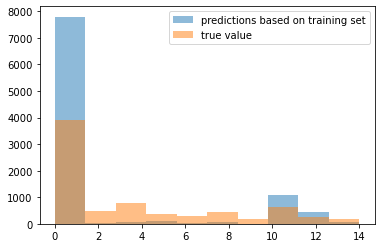

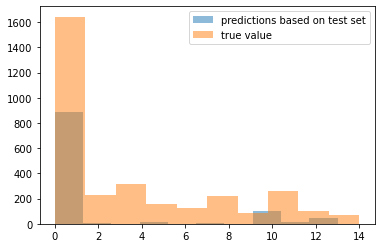

In [40]:
plt.hist(class_train,label='predictions based on training set',alpha=0.5)
plt.hist(y_train,label='true value',alpha=0.5)
plt.legend()
plt.show()

plt.hist(class_test,label='predictions based on test set',alpha=0.5)
plt.hist(y_test,label='true value',alpha=0.5)
plt.legend()
plt.show()